# Torsion member - open section

## Introduction

<p>
Application of Vlasov's theory of torsion is very complex. The following procedure shows an approximate approach utilizing simplified analogy between differential equation of a beam under bending and a member under torsion where it's St'Venant torsional stiffness is approaching zero (G * It --> 0).

For beam of open cross section with loading applied with eccentricity e (Fig.) can internal forces for torsion compound of both St.Venant component and warping component be expressed as
</p>

In [68]:
from IPython.display import display, Math, Latex

\begin{equation*}
B_{Ed} = M_{Ed} * e * (1 - \kappa) \\
T_{t,Ed} = V_{Ed} * e * \kappa   \\
T_{w,Ed} = V_{Ed} * e * (1 - \kappa) \\
\kappa = 1 / [\beta + (\alpha / K_t)^2]
\end{equation*}

kappa ...correction coefficient including true stiffness of the cross-section in St'Venant torsion. It is a function of a non-dimensional partameter in torsion K_t = L * sqrt(G * I_t / E / Iw). Coefficients alpha and beta can be determined from table NB.2.1 of CSN EN 1993-1-1 (further in text).

## Example

The beam is simply supported at both ends. The upper flange is laterally restrained at both supports and at the points of load application.

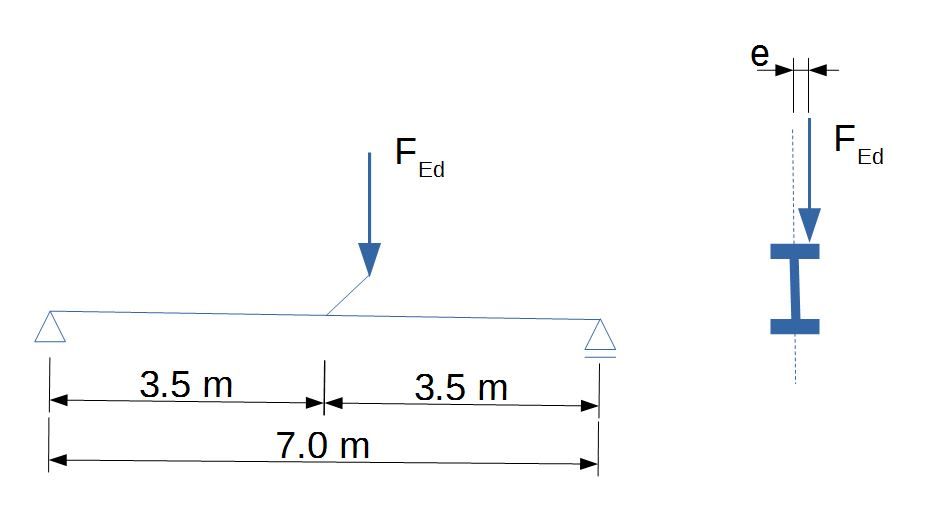

For free warping at both supports kw = 1, for restrained warping kw = 0.5,
for simply supported beam ends ky = 1,
for flange laterally restrained at both ends kz = 0.5,
for flange laterally unrestrained kz = 1.0.

Examples of ends of segments are shown on Figure: 

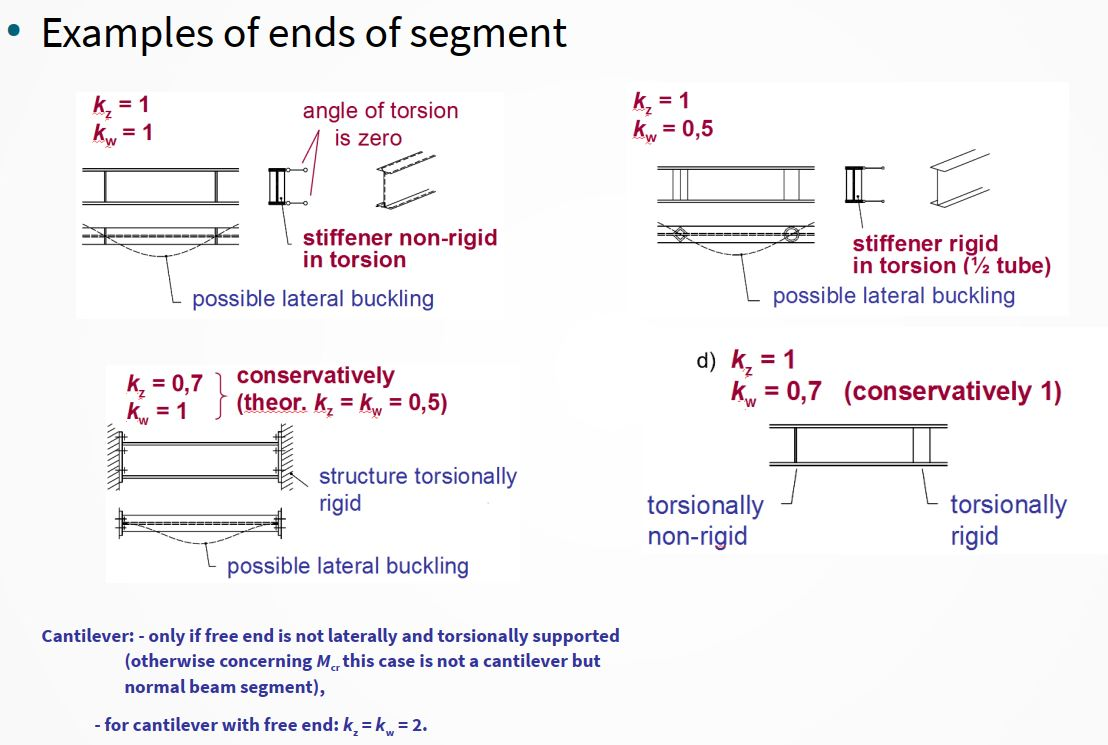

### Sectional Properties

In [69]:
import math

In [70]:
L = 7               #[m], Span
zg = 0.275          #[m], Distance between the point of load application and the shear centre
zs = 0              #[m], Distance between the centre of gravity and centre of shear (zero for symmetrical I-beam)

In [71]:
GammaM0 = 1         #[-], Partial safety factor for material

In [72]:
h = 550             #[mm], Section depth
b = 210             #[mm], Flange width
tf = 17.2           #[mm], Flange thickness
tw = 11.1           #[mm], Web thickness
r = 24              #[mm], Root radius
fy = 460            #[MPa], Yield limit strength
sw = 105.5          #[kg/m], Self weight
Iw = 1884000000000  #[mm^6], Warping constant
It = 1232000        #[mm^4], Torsional constant
E = 210000          #[MPa], Young's modulus
G = 80700           #[MPa], Shear modulus
Iy = 671200000      #[mm^4], Second moment of inertia
Iz = 26680000       #[mm^4], Second moment of inertia
Wely = 2440000      #[mm^3], Sectional modulus
A = 13440           #[mm^2], Cross-sectional area
Avz = 7234          #[mm^2], Shear area

### UDL

In [73]:
# Characteristic values
# Permanent loading
gk = 0 #[kN/m]
# Variable loading
qk = 0 #[kN/m] 
gammaG = 1.35
gammaQ = 1.5
# Design values
gd = gammaG * gk + gammaG * sw * 9.81 / 1000
qd = gammaQ * qk

In [74]:
print("gd                        = ", ("%2.2f" % gd), " [kN/m]")
print("qd                        = ", ("%2.2f" % qd), " [kN/m]")

gd                        =  1.40  [kN/m]
qd                        =  0.00  [kN/m]


### Point loading

In [75]:
FEd = 140 #[kN]
# Eccentricity
e = 0.05  #[m]

### Bending moment

In [76]:
MEd = FEd * L / 4 + (gd + qd) * L**2 / 8
MEdt = FEd * L / 4

In [77]:
print("MEd                       = ", ("%2.2f" % MEd), " [kNm]")
print("MEdt                      = ", ("%2.2f" % MEdt), " [kNm]")

MEd                       =  253.56  [kNm]
MEdt                      =  245.00  [kNm]


### Shear force

In [78]:
VEd = FEd / 2 + (gd + qd) * L / 2
VEdt = FEd / 2

In [79]:
print("VEd                       = ", ("%2.2f" % VEd), " [kN]")
print("VEdt                      = ", ("%2.2f" % VEdt), " [kN]")

VEd                       =  74.89  [kN]
VEdt                      =  70.00  [kN]


In [80]:
# Buckling curve
curve = "B"

In [81]:
# imperfection factor
alphaLT=0.8 
if curve == "A":
    alphaLT=0.21
if curve == "B":
    alphaLT=0.34
if curve == "C":
    alphaLT=0.49
if curve == "D":
    alphaLT=0.76

### Beam evaluation in ULS
The assesment considers the effects of bending and torsion separately.
#### Cross-section classification:

In [82]:
epsilon = math.sqrt(235/fy) 
classFlange = 0
classWeb = 0
checkLimits = True

# classify flange
c = (b - tw - r) / 2
ratio = c / tf
if ratio <= 9 * epsilon:
    classFlange = 1
if ratio > 9 * epsilon and ratio <= 10 * epsilon:
    classFlange = 2
if ratio > 10 * epsilon and ratio <= 14 * epsilon:
    classFlange = 3
if ratio > 14 * epsilon:
    classFlange = -999999
    checkLimits = False

# classify web
c = h - 2 * tf - 2 * r
ratio = c / tw
if ratio <= 72 * epsilon:
    classWeb = 1
if ratio > 72 * epsilon and ratio <= 83 * epsilon:
    classWeb = 2
if ratio > 83 * epsilon and ratio <= 124 * epsilon:
    classWeb = 3
if ratio > 124 * epsilon:
    classWeb = -999999
    checkLimits = False


In [83]:
# Cross-section class:
classSection = max(classFlange, classWeb)

In [84]:
print("Section is Class ...        ", ("%2.0f" % classSection), " [-]")

Section is Class ...          1  [-]


### Bending
The critical moment Mcr is determined based on Annex NB.3 of EN 1993-1-1.

In [85]:
kz = 1 # simple support for bending
kw = 1 # warping not prevented
kappa_wt = math.pi / kw / (1000 * L) * math.sqrt(E * Iw / G / It)
zeta_g = math.pi * (1000 * zg) / kz / (1000 * L) * math.sqrt(E * Iz / G / It)
zj = 0 # section is symmetric about the y axis, therefore zeta_j is also zero
zeta_j = math.pi * (1000 * zj) / kz / (1000 * L) * math.sqrt(E * Iz / G / It)

In [86]:
print("kappa_wt                  = ", ("%2.3f" % kappa_wt), " [-]")
print("zeta_g                    = ", ("%2.3f" % zeta_g), " [-]")
print("zeta_j                    = ", ("%2.3f" % zeta_j), " [-]")

kappa_wt                  =  0.895  [-]
zeta_g                    =  0.926  [-]
zeta_j                    =  0.000  [-]


#### Table NB.3.1 of CSN EN 1993-1-1

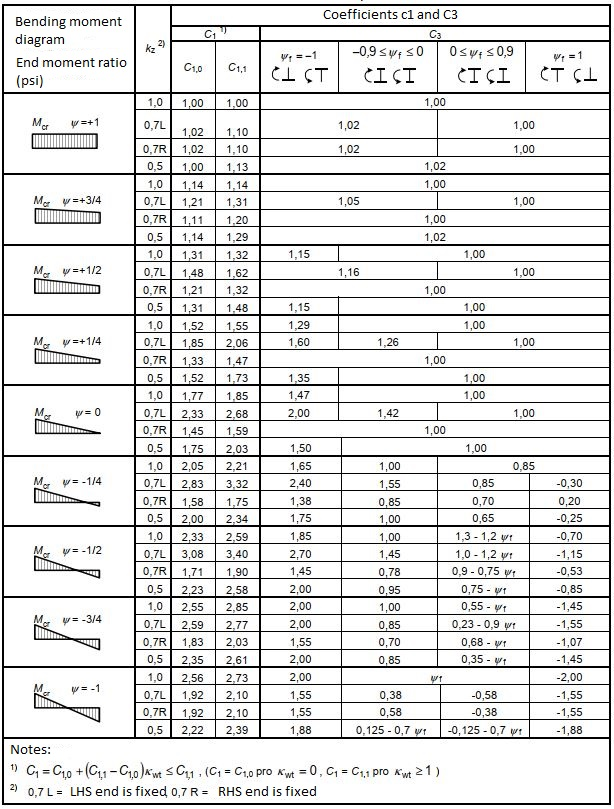

psi_f .... includes assymetry of the profile. 

\begin{equation*}
\psi_f = (I_{fc} - I_{ft}) / (I_{fc} + I_{ft})
\end{equation*}

Ifc .... second moment of inertia of compressed flange with respect to the main axis of the cross-section. 
Ift .... second moment of inertia of tension flange with respect to the main axis of the cross-section.
Therefore for symmetric profile psi_f = 0.

#### Table NB.3.2 of CSN EN 1993-1-1

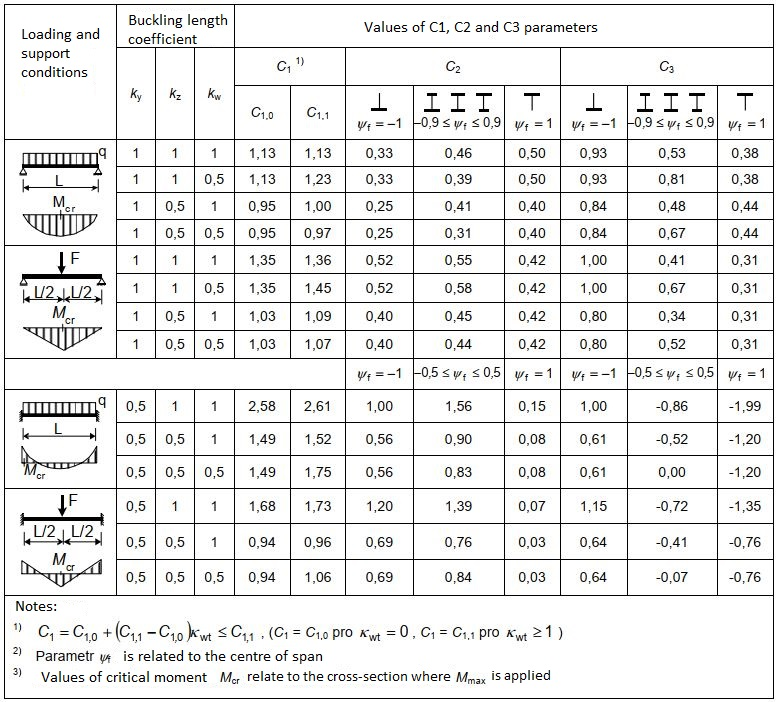

In [87]:
# the following set is for NB.3.2
C10 = 1.35
C11 = 1.36
C1 = C10 + (C11 - C10) * kappa_wt
C2 = 0.55
C3 = 0.41

# the following set is for NB.3.1
C10 = 1.52
C11 = 1.55
C1 = C10 + (C11 - C10) * kappa_wt
C2 = 0.55
C3 = 1

In [88]:
print("C1                        = ", ("%2.3f" % C1), " [-]")

C1                        =  1.547  [-]


In [89]:
# Dimensionless critical moment
mu_cr = C1 / kz * (math.sqrt(1 + kappa_wt**2 + (C2 * zeta_g - C3 * zeta_j)**2) - (C2 * zeta_g - C3 * zeta_j))
M_cr = (mu_cr * math.pi * math.sqrt(E * Iz * G * It) / (1000 * L)) / 1000000
# The relative slenderness
lambda_LT_dash = math.sqrt(Wely * fy / (M_cr * 1000000))

In [90]:
print("mu_cr                     = ", ("%2.3f" % mu_cr), " [-]")
print("M_cr                      = ", ("%2.3f" % M_cr), " [kNm]")
print("lambda_LT_dash            = ", ("%2.3f" % lambda_LT_dash), " [-]")

mu_cr                     =  1.433  [-]
M_cr                      =  479.856  [kNm]
lambda_LT_dash            =  1.529  [-]


In [91]:
PHI_LT = 0.5 * (1 + alphaLT * (lambda_LT_dash - 0.2) + lambda_LT_dash**2)
chi_LT = min(1, 1 / (PHI_LT + math.sqrt(PHI_LT**2 - lambda_LT_dash**2)))

In [92]:
print("PHI_LT                    = ", ("%2.3f" % PHI_LT), " [-]")
print("chi_LT                    = ", ("%2.3f" % chi_LT), " [-]")

PHI_LT                    =  1.896  [-]
chi_LT                    =  0.332  [-]


### Normal stress due to bending

In [93]:
sigma_xb = (MEd * 1000000) / chi_LT / Wely

In [94]:
print("sigma_xb                  = ", ("%2.2f" % sigma_xb), " [MPa]")

sigma_xb                  =  313.34  [MPa]


### Shear stress

In [95]:
tau_b = VEd * 1000 / Avz

In [96]:
print("tau_b                     = ", ("%2.2f" % tau_b), " [MPa]")

tau_b                     =  10.35  [MPa]


### Torsion

In [97]:
K_t = (1000 * L) * math.sqrt(G * It / E / Iw)

In [98]:
print("K_t                       = ", ("%2.3f" % K_t), " [-]")

K_t                       =  3.509  [-]


#### Table NB.2.1 of CSN EN 1993-1-1

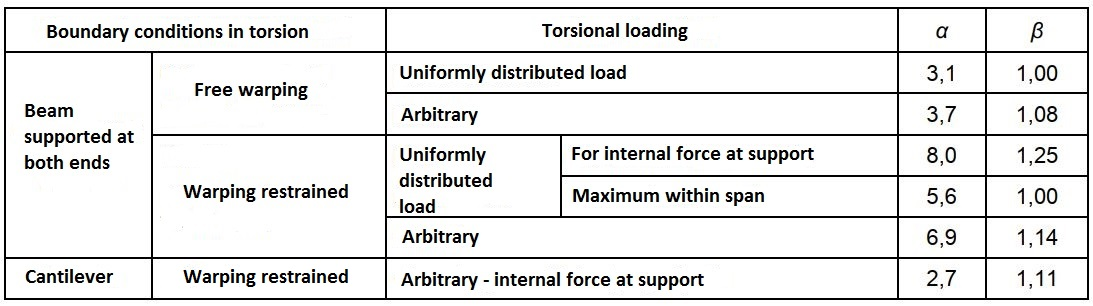

In [99]:
alpha = 3.7
beta = 1.08
# The distribution parameter
kappa = 1 / (beta + (alpha / K_t)**2)

In [100]:
print("kappa                     = ", ("%2.3f" % kappa), " [-]")

kappa                     =  0.456  [-]


#### Bimoment

In [101]:
BEd = MEdt * e * (1 - kappa)

In [102]:
print("BEd                       = ", ("%2.2f" % BEd), " [kNm^2]")

BEd                       =  6.66  [kNm^2]


#### St.Venant torsion moment

In [103]:
TtEd = VEdt * e * kappa

In [104]:
print("TtEd                      = ", ("%2.2f" % TtEd), " [kNm]")

TtEd                      =  1.60  [kNm]


#### Warping torsion moment

In [105]:
TwEd = VEdt * e * (1 - kappa)

In [106]:
print("TwEd                      = ", ("%2.2f" % TwEd), " [kNm]")

TwEd                      =  1.90  [kNm]


### Normal stress due to torsion

In [107]:
# Maximum sectional ordinate
w = 0.25 * b * (h - tf)

In [108]:
print("w                         = ", ("%2.2f" % w), " [mm^2]")

w                         =  27972.00  [mm^2]


In [109]:
sigma_xw = BEd * w / Iw * 10**(9) 

In [110]:
print("sigma_xw                  = ", ("%2.2f" % sigma_xw), " [MPa]")

sigma_xw                  =  98.90  [MPa]


In [111]:
S_w = b**2 * tf * (h - tf) / 16

In [112]:
print("S_w                       = ", ("%2.2f" % S_w), " [mm^4]")

S_w                       =  25258716.00  [mm^4]


In [113]:
tau_f = TtEd * 10**(6) * tf / It

In [114]:
print("tau_f                     = ", ("%2.2f" % tau_f), " [MPa]")

tau_f                     =  22.29  [MPa]


In [115]:
tau_t = TtEd * 10**(6) * tw / It

In [116]:
print("tau_t                     = ", ("%2.2f" % tau_t), " [MPa]")

tau_t                     =  14.39  [MPa]


In [117]:
tau_w = TwEd * 10**(6) * S_w / Iw / tf

In [118]:
print("tau_w                     = ", ("%2.2f" % tau_w), " [MPa]")

tau_w                     =  1.48  [MPa]


#### Resultant stresses
Add normal stress due to bending and torsion:

In [119]:
sigma_xd_max = sigma_xb + sigma_xw

In [120]:
print("sigma_xd_max              = ", ("%2.2f" % sigma_xd_max), " [MPa]")

sigma_xd_max              =  412.24  [MPa]


In [121]:
if sigma_xd_max <= fy /  GammaM0:
    FAIL_SIGMAx = False
else:
    FAIL_SIGMAx = True

In [122]:
if FAIL_SIGMAx == True:
    print("FAIL")
else:
    print("PASS")

PASS


#### Shear stress in beam web: 

In [123]:
tau_d_max_w = tau_b + tau_t + tau_w

In [124]:
print("tau_d_max_w               = ", ("%2.2f" % tau_d_max_w), " [MPa]")

tau_d_max_w               =  26.22  [MPa]


Compare shear stress in beam web with limiting value

In [125]:
if tau_d_max_w <= fy / math.sqrt(3) / GammaM0:
    FAIL_SHEAR = False
else:
    FAIL_SHEAR = True

In [126]:
if FAIL_SHEAR == True:
    print("FAIL")
else:
    print("PASS")

PASS


#### Shear stress in beam flange

In [127]:
tau_d_max_f = tau_f + tau_w

In [128]:
print("tau_d_max_f               = ", ("%2.2f" % tau_d_max_f), " [MPa]")

tau_d_max_f               =  23.78  [MPa]


Compare shear stress in flange with limiting value

In [129]:
if tau_d_max_f <= fy / math.sqrt(3) / GammaM0:
    FAIL_SHEAR = False
else:
    FAIL_SHEAR = True

In [130]:
if FAIL_SHEAR == True:
    print("FAIL")
else:
    print("PASS")

PASS


#### Resulting stress at flange edge:

In [131]:
sigma_dash = math.sqrt(sigma_xd_max**2 + 3 * tau_f**2)

In [132]:
print("sigma_dash                = ", ("%2.2f" % sigma_dash), " [MPa]")

sigma_dash                =  414.04  [MPa]


In [133]:
if sigma_dash <= fy / GammaM0:
    FAIL_STRESS = False
else:
    FAIL_STRESS = True

In [134]:
if FAIL_STRESS == True:
    print("FAIL")
else:
    print("PASS")

PASS


#### Graphical representation

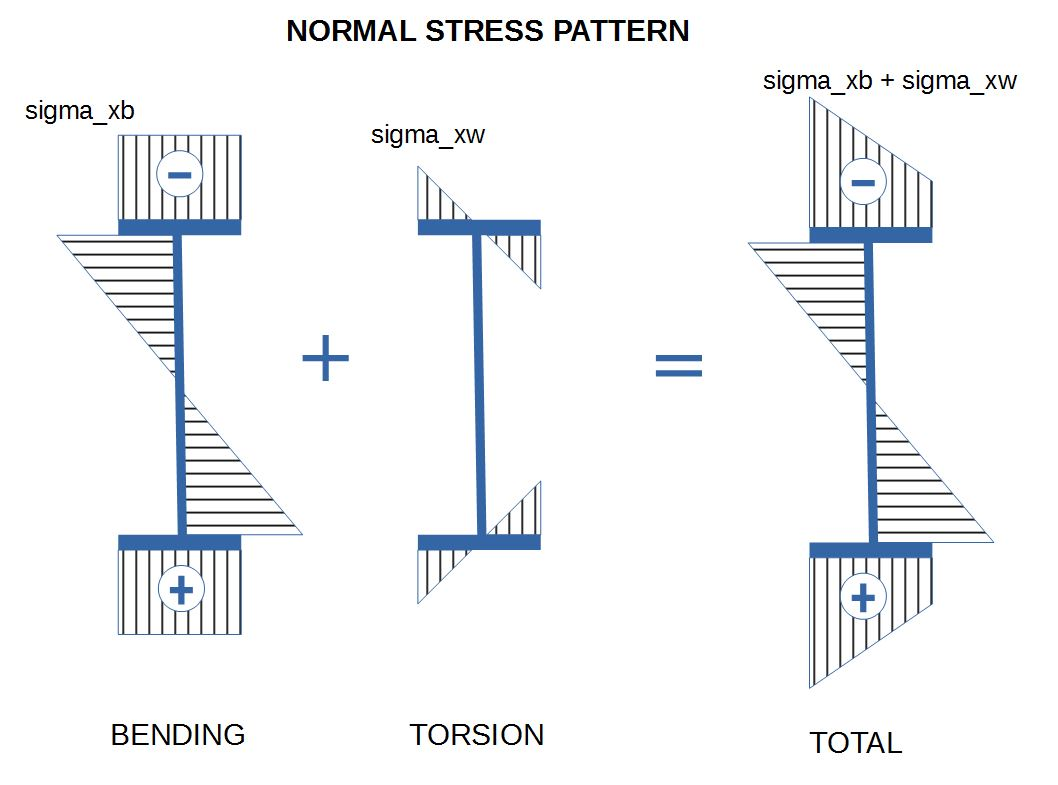

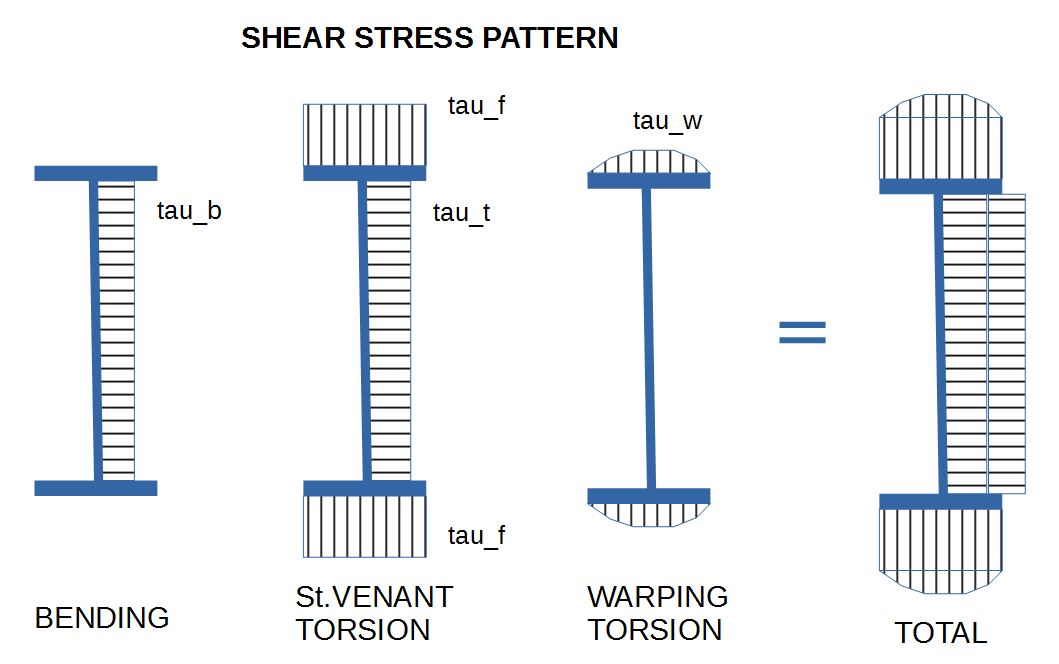

### Resources

[1] Melcher, Karmazinova, Bajer, Sykora. Prvky kovovych konstrukci. Pruty namahane kroucenim. VUT Brno. Pdf document. <br>
[2] Machacek. CVUT Praha. Krouceni-kriticky-moment(klopeni podle Eurokodu).pdf document <br>
[3] Wald, Machacek, Jandera, Dolejs, Sokol, Hajek. Structural Steel Design according to Eurocodes. Czech Technical University in Prague. ISBN 978-80-01-05046-0